In [1]:
!pip install pmdarima

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
data = pd.read_csv('wipro.csv')
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,03-01-2000,WIPRO,EQ,2522.40,2724.00,2724.20,2724.00,2724.20,2724.20,2724.17,1599,4.355940e+11,NaN,NaN,NaN
1,04-01-2000,WIPRO,EQ,2724.20,2942.15,2942.15,2942.15,2942.15,2942.15,2942.15,4392,1.292190e+12,NaN,NaN,NaN
2,05-01-2000,WIPRO,EQ,2942.15,2942.15,3177.55,2715.00,3000.00,2990.10,3063.86,132297,4.053390e+13,NaN,NaN,NaN
3,06-01-2000,WIPRO,EQ,2990.10,3144.70,3183.00,2790.00,2915.00,2932.25,2962.41,72840,2.157820e+13,NaN,NaN,NaN
4,07-01-2000,WIPRO,EQ,2932.25,2751.00,2751.00,2697.70,2697.70,2697.70,2697.95,10110,2.727630e+12,NaN,NaN,NaN


In [4]:
data['Date'] = pd.to_datetime(data['Date'], format = '%d-%m-%Y')
data.set_index(data['Date'], drop = True, inplace = True)
data = data[['Open', 'Close']]
data.describe()

,Open,Close
count,5306.000000,5306.000000
mean,756.799981,754.474783
std,803.371567,794.159260
min,163.100000,162.350000
25%,380.575000,380.525000
50%,504.000000,503.250000
75%,680.000000,678.687500
max,10350.000000,9587.450000


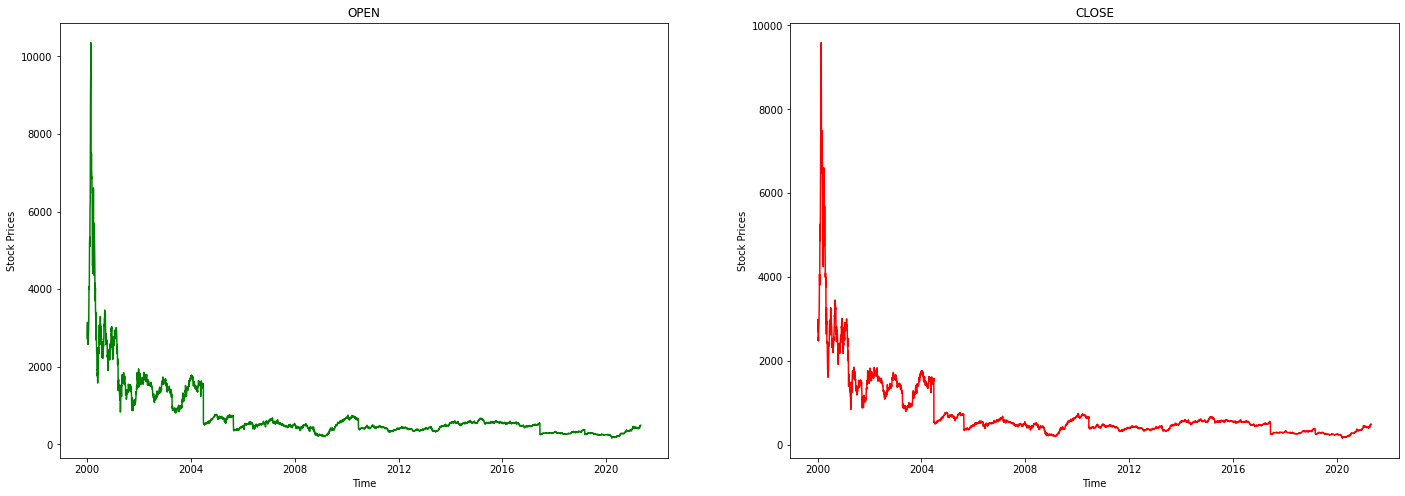

In [5]:
fig = plt.figure(figsize=(24, 8))
plt.subplot(1, 2, 1)
plt.title('OPEN')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.plot(data['Open'], color = 'green')
plt.subplot(1, 2, 2)
plt.title('CLOSE')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.plot(data['Close'], color = 'red')
plt.show()

In [6]:
#Scaling data to log scale
print(data)
data = np.log(data)

               Open    Close
Date                        
2000-01-03  2724.00  2724.20
2000-01-04  2942.15  2942.15
2000-01-05  2942.15  2990.10
2000-01-06  3144.70  2932.25
2000-01-07  2751.00  2697.70
...             ...      ...
2021-04-26   479.40   480.30
2021-04-27   481.40   485.05
2021-04-28   485.85   489.30
2021-04-29   492.70   489.85
2021-04-30   491.50   492.75

[5306 rows x 2 columns]


<Figure size 1728x576 with 0 Axes>

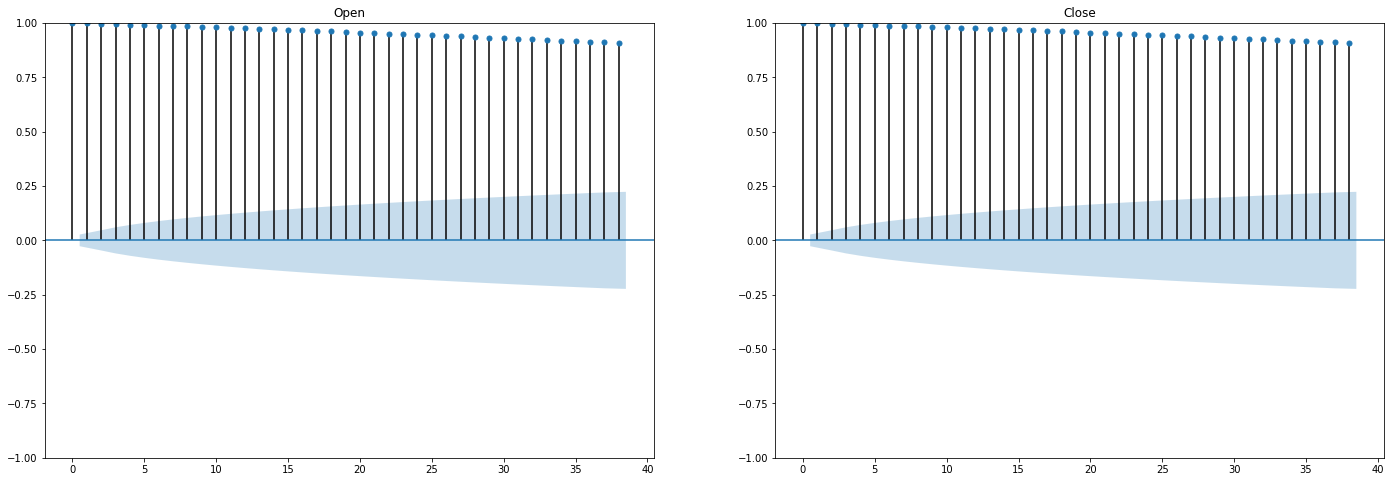

In [7]:
#Autocorrelation function plots
fig = plt.figure(figsize=(24, 8))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (24, 8))
plot_acf(data['Open'], ax = ax1, title = 'Open')
plot_acf(data['Close'], ax = ax2, title = 'Close')
plt.show()

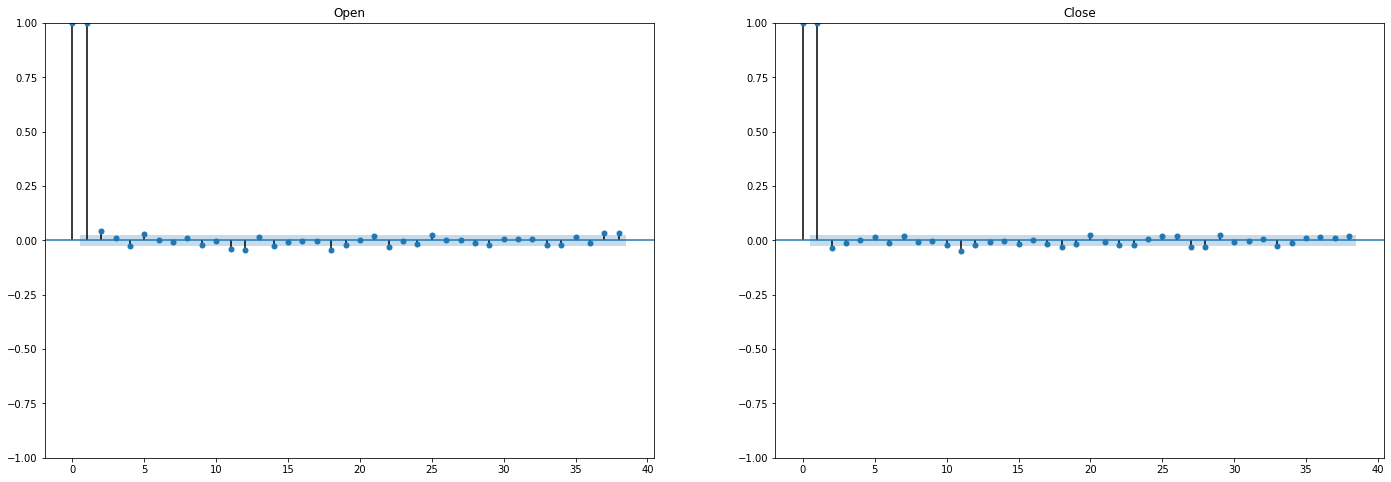

In [8]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (24, 8))
plot_pacf(data['Open'], ax = ax1, title = 'Open')
plot_pacf(data['Close'], ax = ax2, title = 'Close')
plt.show()

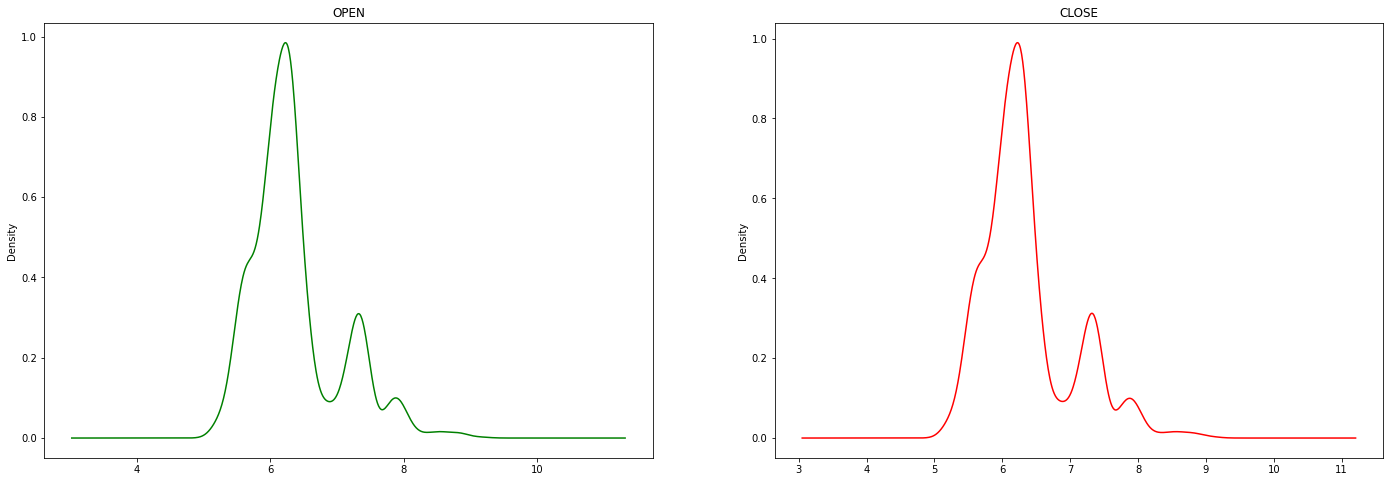

In [9]:
#Probability distribution visualisation
fig = plt.figure(figsize=(24, 8))
plt.subplot(1, 2, 1)
plt.title('OPEN')
data['Open'].plot(kind = 'kde', color = 'green')
plt.subplot(1, 2, 2)
plt.title('CLOSE')
data['Close'].plot(kind = 'kde', color = 'red')
plt.show()

In [10]:
#Test for staionarity
def test_stationarity(timeseries):
  #Determing rolling statistics
  rolmean = timeseries.rolling(12).mean()
  rolstd = timeseries.rolling(12).std()
  #Plot rolling statistics:
  plt.plot(timeseries, color = 'blue', label = 'Original')
  plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
  plt.plot(rolstd, color = 'green', label = 'Rolling Std')
  plt.legend()
  plt.title('Rolling Mean and Standard Deviation')
  plt.show()
  print("***ADF TEST***")
  adftest = adfuller(timeseries, autolag = 'AIC')
  print(adftest)
  output = pd.Series(adftest[0:4], index = ['Test Statistics', 'p-value', 'No. of lags used', 'Number of observations used'])
  for key, value in adftest[4].items():
      output['Critical Value ({})'.format(key)] = value
  print(output)

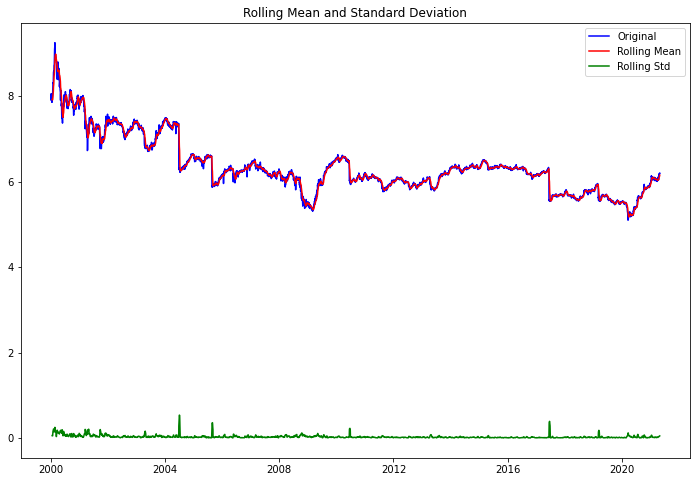

***ADF TEST***
(-3.17155107997978, 0.02169160877355942, 17, 5288, {'1%': -3.4315872309375353, '5%': -2.862086728841279, '10%': -2.5670610232985482}, -19534.580505913884)
Test Statistics                  -3.171551
p-value                           0.021692
No. of lags used                 17.000000
Number of observations used    5288.000000
Critical Value (1%)              -3.431587
Critical Value (5%)              -2.862087
Critical Value (10%)             -2.567061
dtype: float64


In [11]:
fig = plt.figure(figsize = (12, 8))
test_stationarity(data['Open'])

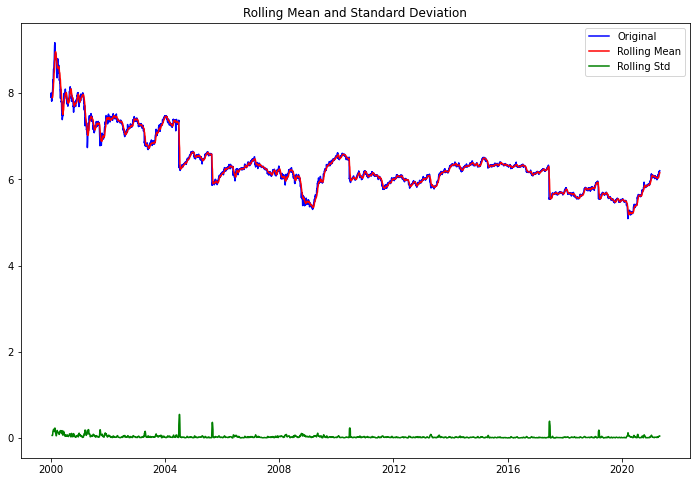

***ADF TEST***
(-2.638671703442089, 0.08526506880813928, 0, 5305, {'1%': -3.4315832642803406, '5%': -2.8620849763501828, '10%': -2.5670600903865166}, -20644.310929001203)
Test Statistics                  -2.638672
p-value                           0.085265
No. of lags used                  0.000000
Number of observations used    5305.000000
Critical Value (1%)              -3.431583
Critical Value (5%)              -2.862085
Critical Value (10%)             -2.567060
dtype: float64


In [12]:
fig = plt.figure(figsize = (12, 8))
test_stationarity(data['Close'])

In [13]:
#Train - Test split
train_len = round(len(data) * 0.70)
training_data = data[:train_len]
training_data

,Open,Close
Date,,
2000-01-03,7.909857,7.909930
2000-01-04,7.986896,7.986896
2000-01-05,7.986896,8.003062
2000-01-06,8.053474,7.983525
2000-01-07,7.919720,7.900155
...,...,...
2014-11-18,6.336737,6.339036
2014-11-19,6.343880,6.336649
2014-11-20,6.343880,6.348964


In [14]:
testing_data = data[train_len:]
testing_data

,Open,Close
Date,,
2014-11-25,6.369901,6.365697
2014-11-26,6.369901,6.362683
2014-11-27,6.362597,6.366470
2014-11-28,6.372466,6.372978
2014-12-01,6.376727,6.384520
...,...,...
2021-04-26,6.172535,6.174411
2021-04-27,6.176699,6.184252
2021-04-28,6.185900,6.192976


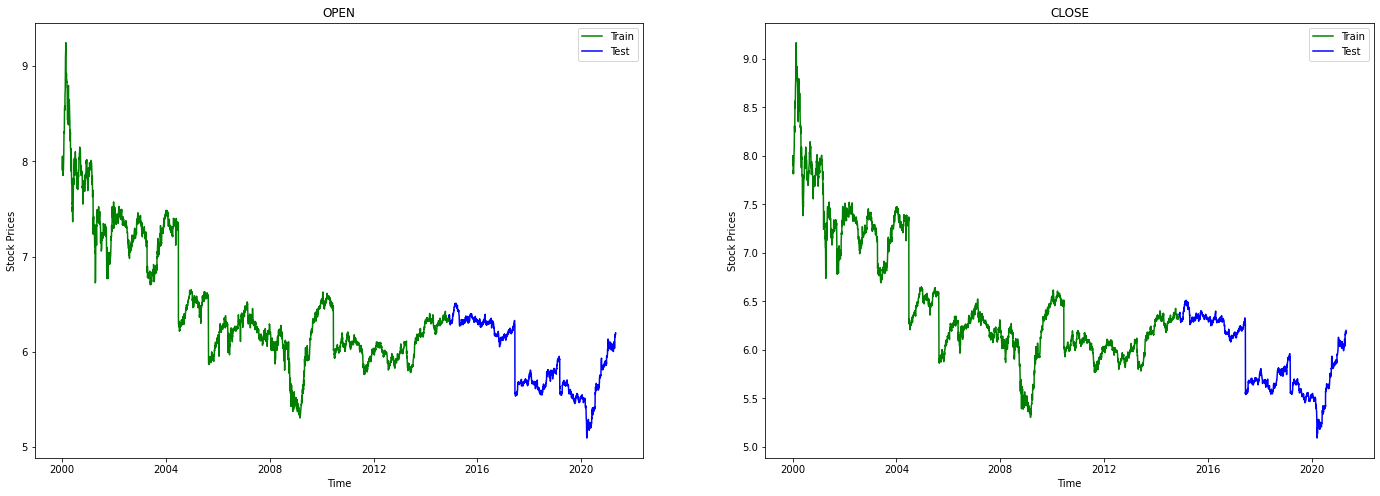

In [15]:
plt.figure(figsize = (24,8))
plt.subplot(1, 2, 1)
plt.title('OPEN')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.plot(training_data['Open'], 'green', label = 'Train')
plt.plot(testing_data['Open'], 'blue', label = 'Test')
plt.legend()
plt.subplot(1, 2, 2)
plt.title('CLOSE')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.plot(training_data['Close'], color = 'green', label = 'Train')
plt.plot(testing_data['Close'], color = 'blue', label = 'Test')
plt.legend()
plt.show()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-12873.894, Time=1.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-12892.911, Time=0.68 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-12893.930, Time=2.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-12875.535, Time=0.37 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-12893.047, Time=3.78 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-12893.360, Time=2.54 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-12892.088, Time=4.43 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-12895.490, Time=1.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-12894.601, Time=0.86 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-12894.908, Time=1.81 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-12894.491, Time=0.46 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-12893.637, Time=0.91 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 20.270 seconds
                               SARIMAX Results                 

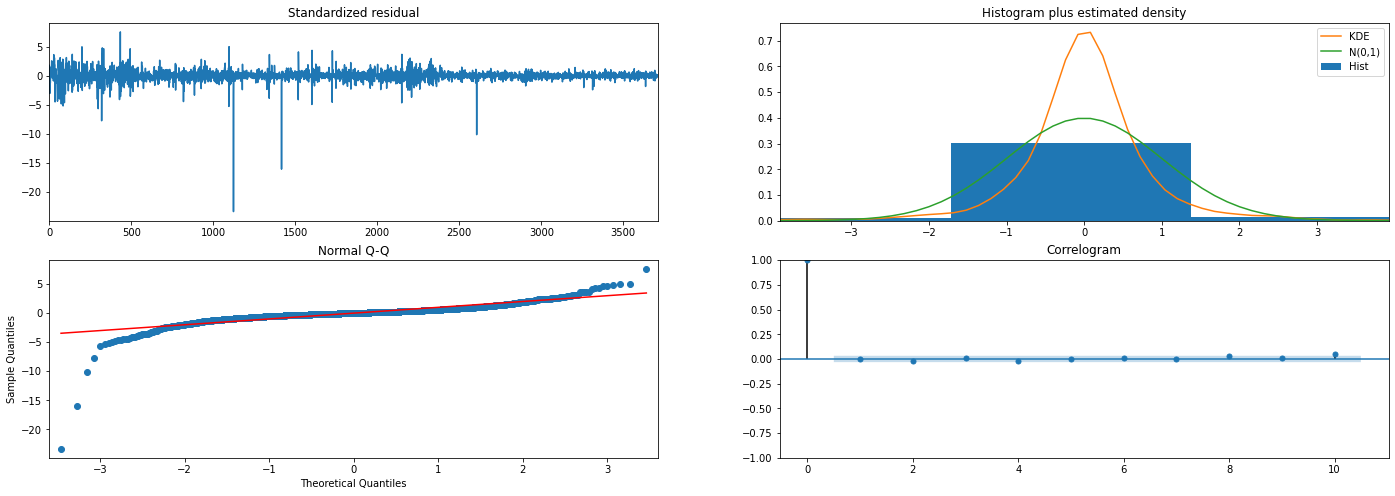

In [16]:
model_autoARIMA = auto_arima(training_data['Open'], start_p = 0, start_q = 0,
                             test = 'adf',         #ADF to find optimal 'd'
                             max_p = 3, max_q = 3, #MAX 'p' and 'q'
                             m = 1,                #Frequency of series
                             d = None,             #Auto determine 'd'
                             seasonal=False,       #No Seasonality
                             start_P = 0,          #AR order for seaonality 
                             D = 0,                #Order of D for seasonality
                             trace = True,
                             error_action = 'ignore',  
                             suppress_warnings = True, 
                             stepwise = True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize = (24, 8))
plt.show()

In [17]:
#Train Model
model = SARIMAX(training_data['Open'], order = (0, 1, 1))
fit = model.fit()
print(fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                 3714
Model:               SARIMAX(0, 1, 1)   Log Likelihood                6449.745
Date:                Wed, 20 Apr 2022   AIC                         -12895.490
Time:                        17:39:53   BIC                         -12883.051
Sample:                             0   HQIC                        -12891.064
                               - 3714                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0768      0.008     -9.585      0.000      -0.093      -0.061
sigma2         0.0018   5.76e-06    315.045      0.000       0.002       0.002
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [18]:
predictions = fit.get_forecast(steps = 1592)
predictions = predictions.summary_frame()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


In [19]:
predictions.index = testing_data.index
predictions

Open,mean,mean_se,mean_ci_lower,mean_ci_upper
Date,,,,
2014-11-25,6.350441,0.042592,6.266963,6.433919
2014-11-26,6.350441,0.057966,6.236831,6.464052
2014-11-27,6.350441,0.070043,6.213160,6.487722
2014-11-28,6.350441,0.080324,6.193009,6.507873
2014-12-01,6.350441,0.089431,6.175160,6.525723
...,...,...,...,...
2021-04-26,6.350441,1.566925,3.279324,9.421559
2021-04-27,6.350441,1.567419,3.278357,9.422525
2021-04-28,6.350441,1.567912,3.277391,9.423492


In [20]:
mse = mean_squared_error(testing_data['Open'], predictions['mean'])
print('MSE: ' + str(mse))
mae = mean_absolute_error(testing_data['Open'], predictions['mean'])
print('MAE: ' + str(mae))

import math
rmse = math.sqrt(mse)
print('RMSE: ' + str(rmse))
mape = np.mean(np.abs(predictions['mean'] - testing_data['Open']) / np.abs(testing_data['Open']))
print('MAPE: '+str(mape))

MSE: 0.31211159027035673
MAE: 0.44702864331101333
RMSE: 0.558669482136224
MAPE: 0.07920379910250348


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-13772.080, Time=0.42 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-13771.806, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-13771.764, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-13773.629, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-13770.092, Time=1.65 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.043 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3714
Model:               SARIMAX(0, 1, 0)   Log Likelihood                6887.815
Date:                Wed, 20 Apr 2022   AIC                         -13773.629
Time:                        17:40:35   BIC                         -13767.409
Sample:                             0   HQIC                        -13771.416
                               - 3714                             

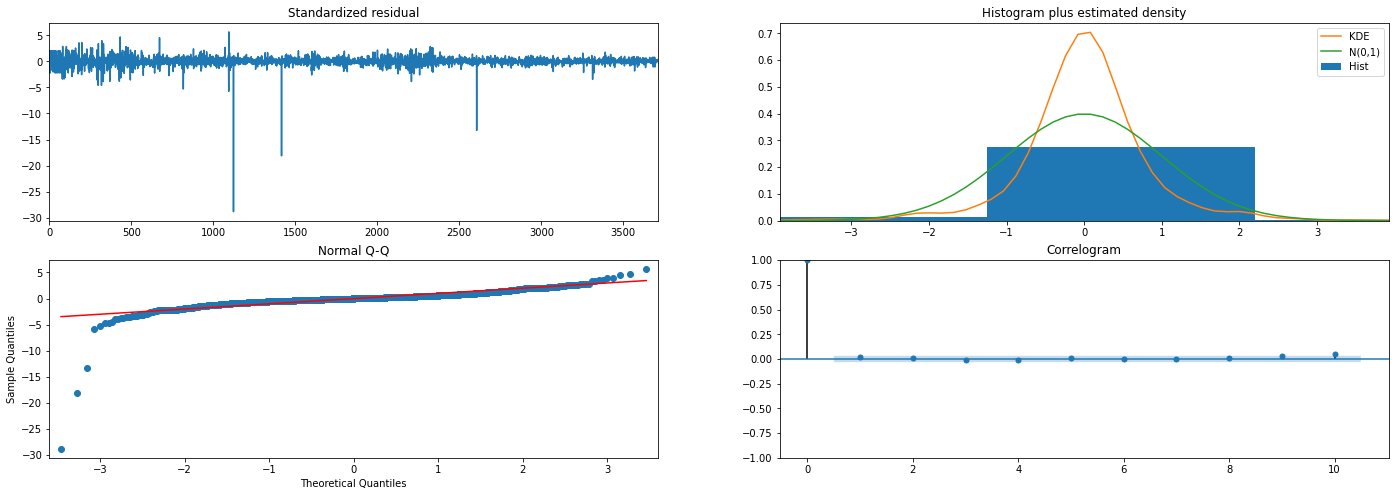

In [21]:
model_autoARIMA = auto_arima(training_data['Close'], start_p = 0, start_q = 0,
                             test = 'adf',         #ADF to find optimal 'd'
                             max_p = 3, max_q = 3, #MAX 'p' and 'q'
                             m = 1,                #Frequency of series
                             d = None,             #Auto determine 'd'
                             seasonal=False,       #No Seasonality
                             start_P = 0,          #AR order for seaonality 
                             D = 0,                #Order of D for seasonality
                             trace = True,
                             error_action = 'ignore',  
                             suppress_warnings = True, 
                             stepwise = True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize = (24, 8))
plt.show()

In [22]:
#Train Model
model = SARIMAX(training_data['Close'], order = (0, 1, 0))
fit = model.fit()
print(fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3714
Model:               SARIMAX(0, 1, 0)   Log Likelihood                6887.815
Date:                Wed, 20 Apr 2022   AIC                         -13773.629
Time:                        17:40:50   BIC                         -13767.409
Sample:                             0   HQIC                        -13771.416
                               - 3714                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0014   3.13e-06    458.247      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   1.73   Jarque-Bera (JB):           7794476.78
Prob(Q):                              0.19   Pr

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [23]:
predictions = fit.get_forecast(steps = 1592)
predictions = predictions.summary_frame()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


In [24]:
predictions.index = testing_data.index
predictions

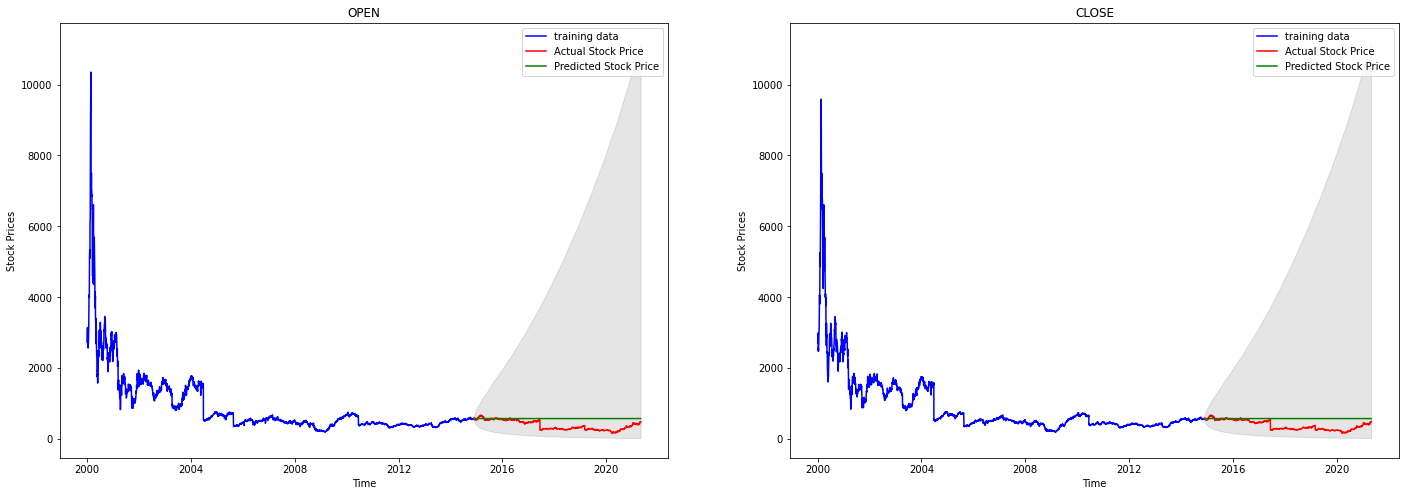

In [25]:
plt.figure(figsize = (24, 8))
plt.subplot(1, 2, 1)
plt.title('OPEN')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.plot(np.exp(training_data['Open']), color = 'blue', label = 'training data')
plt.plot(np.exp(testing_data['Open']), color = 'red', label = 'Actual Stock Price')
plt.plot(np.exp(predictions['mean']), color = 'green', label = 'Predicted Stock Price')
plt.fill_between(predictions.index, np.exp(predictions['mean_ci_lower']), np.exp(predictions['mean_ci_upper']), color = 'k', alpha = 0.1)
plt.legend()
plt.subplot(1, 2, 2)
plt.title('CLOSE')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.plot(np.exp(training_data['Close']), color = 'blue', label = 'training data')
plt.plot(np.exp(testing_data['Close']), color = 'red', label = 'Actual Stock Price')
plt.plot(np.exp(predictions['mean']), color = 'green', label = 'Predicted Stock Price')
plt.fill_between(predictions.index, np.exp(predictions['mean_ci_lower']), np.exp(predictions['mean_ci_upper']), color = 'k', alpha = 0.1)
plt.legend()
plt.show()

In [26]:
mse = mean_squared_error(testing_data['Close'], predictions['mean'])
print('MSE: ' + str(mse))
mae = mean_absolute_error(testing_data['Close'], predictions['mean'])
print('MAE: ' + str(mae))

import math
rmse = math.sqrt(mse)
print('RMSE: ' + str(rmse))
mape = np.mean(np.abs(predictions['mean'] - testing_data['Close']) / np.abs(testing_data['Close']))
print('MAPE: '+str(mape))

MSE: 0.3227312709386424
MAE: 0.45728731236556713
RMSE: 0.5680944207952076
MAPE: 0.08097574720099956
